# Data Description

A large child education toy company which sells edutainment tablets and gaming systems both online and in retail stores wanted to analyze the customer data. They are operating from last few years and maintaining all transactional information data. The given data ‘CustomerData.csv’ is a sample of customer level data extracted and processed for the analysis from various set of transactional files.

The objectives of today’s activity are :

Building a regression model to predict the customer revenue based on other factors and understand the influence of other attributes on revenue.

Here's a brief description of each column in the order you provided:

1. CustomerID: A unique identifier for each customer.
2. City: The city where the customer lives.
3. NoOfChildren: The number of children the customer has.
4. MinAgeOfChild: The minimum age of the customer's children.
5. MaxAgeOfChild: The maximum age of the customer's children.
6. Tenure: The length of time the customer has been a customer of the company.
7. FrquncyOfPurchase: The frequency with which the customer makes purchases.
8. NoOfUnitsPurchased: The total number of units purchased by the customer.
9. FrequencyOFPlay: The frequency with which the customer plays games on the company's products.
10. NoOfGamesPlayed: The total number of games played by the customer.
11. NoOfGamesBought: The total number of games bought by the customer.
12. FavoriteChannelOfTransaction: The customer's preferred channel for making transactions.
13. FavoriteGame: The customer's favorite game.
14. TotalRevenueGenerated: The total revenue generated by the customer.

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Data Understanding

In [2]:
# reading the data
data = pd.read_csv("CustomerData.csv")

In [3]:
# checking length of the data
data.shape

(3209, 14)

In [4]:
# checking first 5 rows 
data.head(5)

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [5]:
# getting column names
data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [6]:
# summarizing data
data.describe(include='all')

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


In [7]:
# checking datatypes of data
data.dtypes

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

In [8]:
# checking for null values
data.isnull().sum()

CustomerID                      0
City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrquncyOfPurchase               0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In [9]:
# dropping 'CustomerID' column because it is not useful
data.drop('CustomerID', axis=1, inplace=True)

In [10]:
# checking first 5 rows of data after dropping 'CustomerID' column
data.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


# DataType Conversion 

In [11]:
# converting columns to category
for col in ['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']:
    data[col] = data[col].astype('category')

In [12]:
# checking for datatypes after datatype conversion
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

# Handling Outliers

In [13]:
# checking summary again
data.describe(include='all')

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.0,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,2843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,NaN,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,NaN,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,NaN,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,NaN,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,NaN,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,NaN,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


In [14]:
# checking how many rows are with 'MinAgeOfChild' and 'MaxAgeOfChild' is 113 because there will be no age of child is 113
data.loc[(data['MinAgeOfChild']==113) | (data['MaxAgeOfChild']==113),].shape

(20, 13)

In [15]:
# excluding those rows in data using 'loc'
data=data.loc[(data['MinAgeOfChild'] !=113) & (data['MaxAgeOfChild']!=113),:] 
print(data.shape)

(3189, 13)


In [16]:
# Define a list of columns to remove outliers
cols_to_remove_outliers = ['FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay', 'NoOfGamesPlayed', 'NoOfGamesBought']

# Iterate over the columns to remove outliers from
for col in cols_to_remove_outliers:
    # Calculate quartiles for the current column
    Q1, Q3 = data[col].quantile([0.25, 0.75])
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers from the current column
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [17]:
# checking shape after removing outliers
data.shape

(2656, 13)

In [18]:
# summarizing data after removing ouliers
data.describe()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
count,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000
mean,2.063630,4.916792,7.326431,339.523343,14.167922,12.862575,1107.115211,69.480798,12.708961,152.514134
std,0.987349,1.698854,2.787380,91.822355,5.254829,4.301572,911.901632,47.161177,6.035239,55.063656
min,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000
25%,1.000000,4.000000,6.000000,286.000000,10.000000,10.000000,389.000000,32.000000,9.000000,113.867500
50%,2.000000,5.000000,7.000000,365.000000,14.000000,12.000000,867.500000,60.000000,13.000000,135.015000
75%,3.000000,6.000000,8.000000,406.000000,17.000000,15.000000,1611.500000,98.000000,17.000000,175.000000
max,11.000000,18.000000,23.000000,472.000000,30.000000,25.000000,4085.000000,208.000000,29.000000,591.750000


# EDA

<AxesSubplot:>

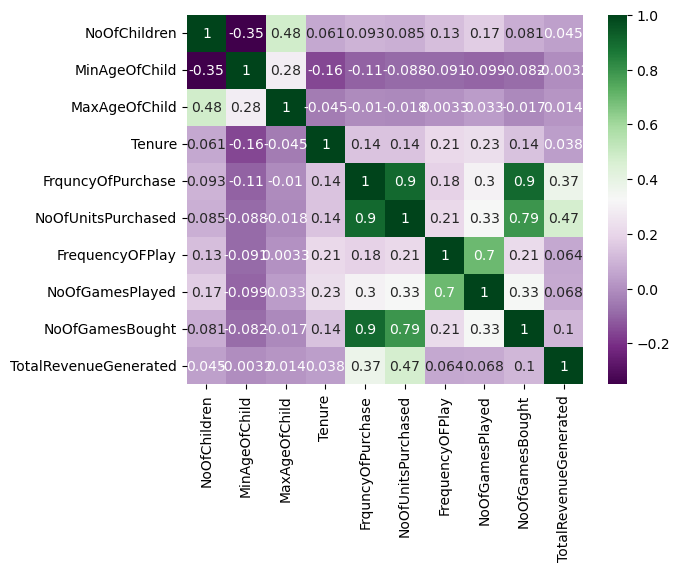

In [19]:
# plotting correlation plot
sns.heatmap(data.corr(),cmap='PRGn',annot=True)

<AxesSubplot:xlabel='City', ylabel='count'>

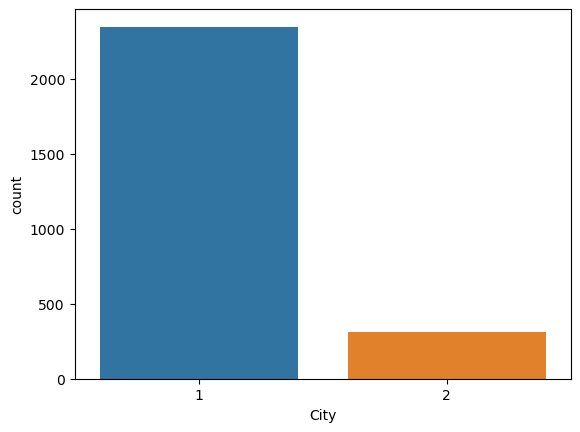

In [20]:
# plotting countplot for 'City' column
sns.countplot(data['City'])

<AxesSubplot:xlabel='FavoriteChannelOfTransaction', ylabel='count'>

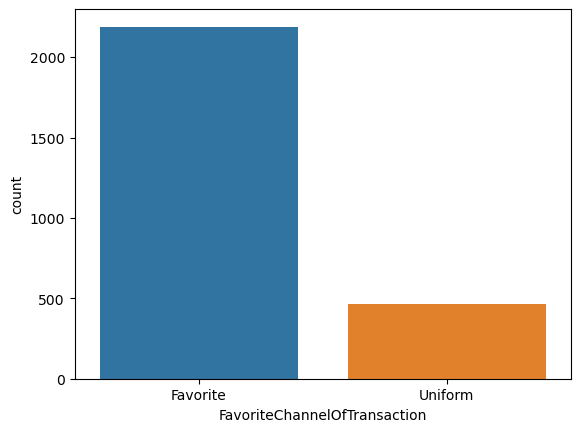

In [21]:
# plotting countplot for 'FavoriteChannelOfTransaction' column
sns.countplot(data['FavoriteChannelOfTransaction'])

<AxesSubplot:xlabel='FavoriteGame', ylabel='count'>

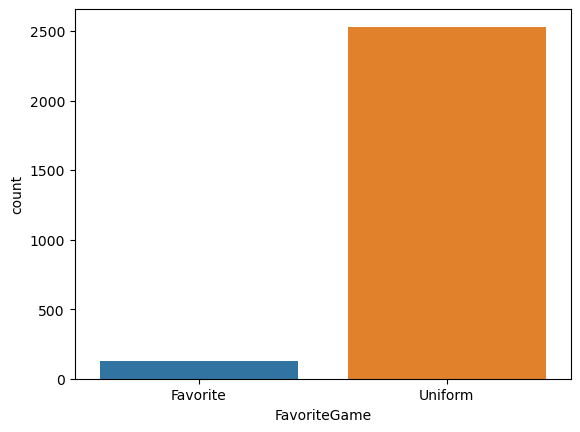

In [22]:
# plotting countplot for 'FavoriteGame' column
sns.countplot(data['FavoriteGame'])

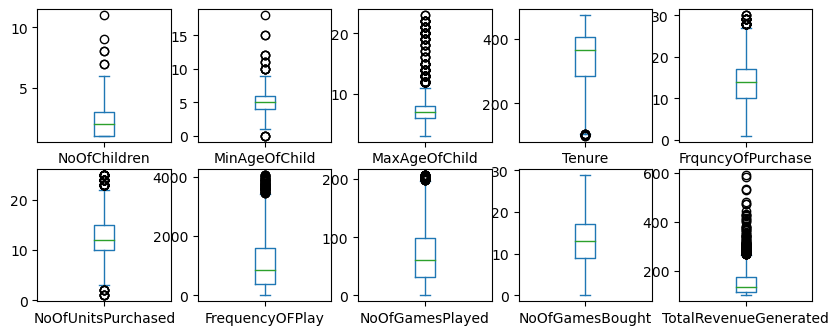

In [23]:
# plotiing Box Plot
data.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(10,10))
plt.show()

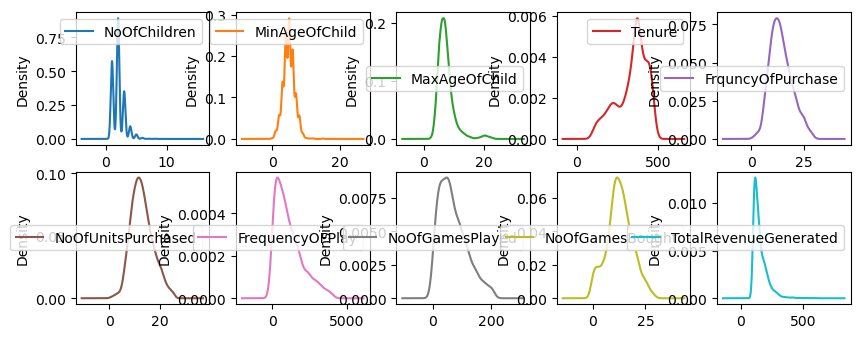

In [24]:
# plotting density plot
data.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(5,5),figsize=(10,10))
plt.show()

# Dummification

In [25]:
# checking for datatypes
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

In [26]:
# creating a variable of list with 'category' columns
cat_attr = data.select_dtypes(include=['category']).columns

In [27]:
# dummifying the category columns using get_dummies function
data = pd.get_dummies(columns=cat_attr, data=data)

In [28]:
# checking for columns after dummification
data.columns

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated', 'City_1',
       'City_2', 'FavoriteChannelOfTransaction_Favorite',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Favorite',
       'FavoriteGame_Uniform'],
      dtype='object')

In [29]:
# after dummifying checking first 5 rows
data.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_1,City_2,FavoriteChannelOfTransaction_Favorite,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Favorite,FavoriteGame_Uniform
0,2,3,8,210,11,11,2344,108,10,107.51,1,0,0,1,0,1
1,2,3,6,442,20,20,245,22,7,382.40,1,0,1,0,0,1
2,4,3,5,424,18,18,1059,130,18,135.01,1,0,1,0,0,1
3,1,6,6,261,11,9,365,34,11,125.00,1,0,1,0,0,1
5,2,3,4,378,16,16,228,12,16,150.00,1,0,1,0,1,0


# Train-Test Split

In [30]:
# splitting data into X and y with test size 20% of data 
y = data['TotalRevenueGenerated']
X = data.drop(['TotalRevenueGenerated'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [31]:
# checking for shapes of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2124, 15)
(532, 15)
(2124,)
(532,)


In [32]:
# creating a variable which select the columns with datatypes of 'int64' & 'float64' 
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought'],
      dtype='object')

# Model Building 

In [33]:
# instantiating DecisionTreeRegressor with some parameters and fitting to train data
model = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3)

In [34]:
# predicting the model with test and calculating mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 1792.0088380553912


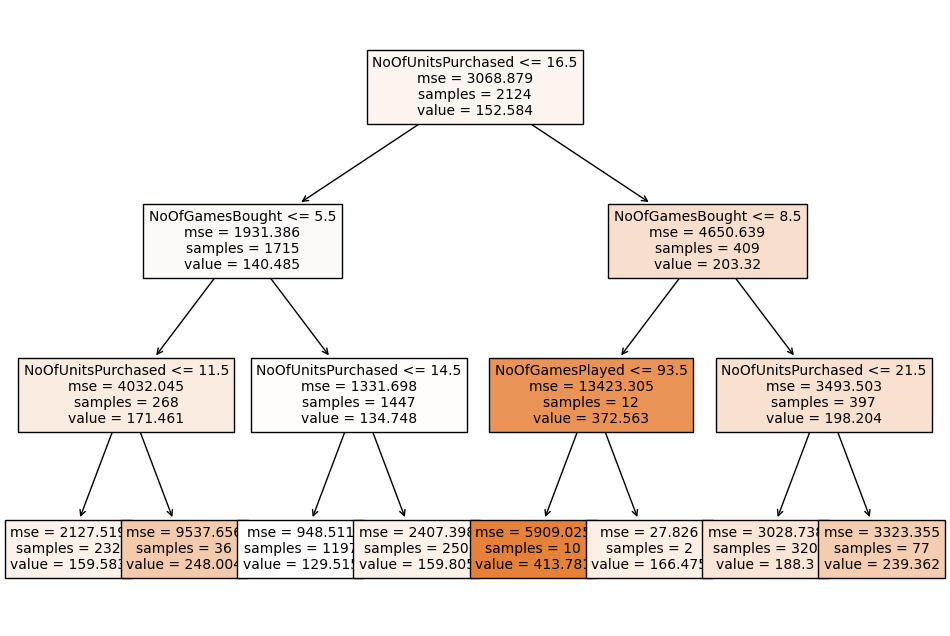

In [35]:
# import plot_tree library to plot tree of model
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.show()